In [6]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras


DATASET_PATH = 'data.json'

def load_data(dataset_path):
    with open(dataset_path, 'r') as fp:
        data = json.load(fp)
        
        
    # convert lists into numpy arrays
    inputs = np.array(data['mfcc'])
    targets = np.array(data['labels'])
    
    return inputs,targets

if __name__ == '__main__':
    
    # load data
    inputs, targets = load_data(DATASET_PATH)

    # split the data into train and test sets
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, 
                                                                              targets, 
                                                                              test_size=0.3)
    
    # build the network arch
    model = keras.Sequential([
        # input layer
        keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])), # input start from 1 because its 3 dimensi
        
        # 1st hidden layer
        keras.layers.Dense(512, activation='relu'), # rectified linear unit
        
        # 2nd hidden layer
        keras.layers.Dense(256, activation='relu'),
        
        # 3rd hidden layer
        keras.layers.Dense(64, activation='relu'),
        
        # output layer
        keras.layers.Dense(10, activation='softmax')
    ])
    
    # compile network
    optimizer = keras.optimizers.Adam(learning_rate = 0.0001)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    model.summary()
    
    # train network
    model.fit(inputs_train, targets_train, 
              validation_data=(inputs_test, targets_test),
              epochs=50,
              batch_size=32)
    

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               865792    
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_9 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                650       
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
219/219 [==============================] - 5s 11ms/step - loss: 7.9177 - accuracy: 0.3237 - val_los

The result is overfitting. The test accuracy have a huge difference with train accuracy.

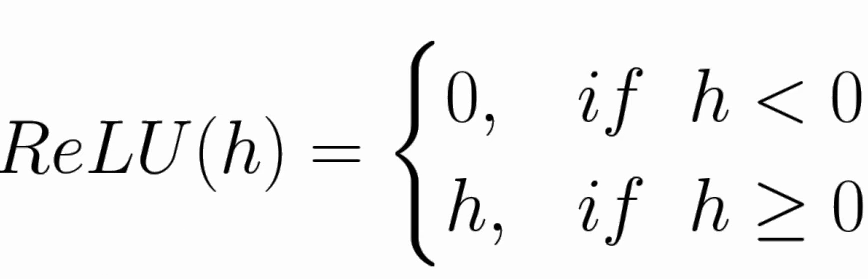

Why using relu? its very effective for training. when compared with sigmoid, it enables us to train network faster and enables better convergence of network. 
Relu reduces likelihood/probability of vanishing gradient.

Softmap --> activation function that enables us to have normalize output.

Adam --> optimizer (like extension) that very efektif with DL

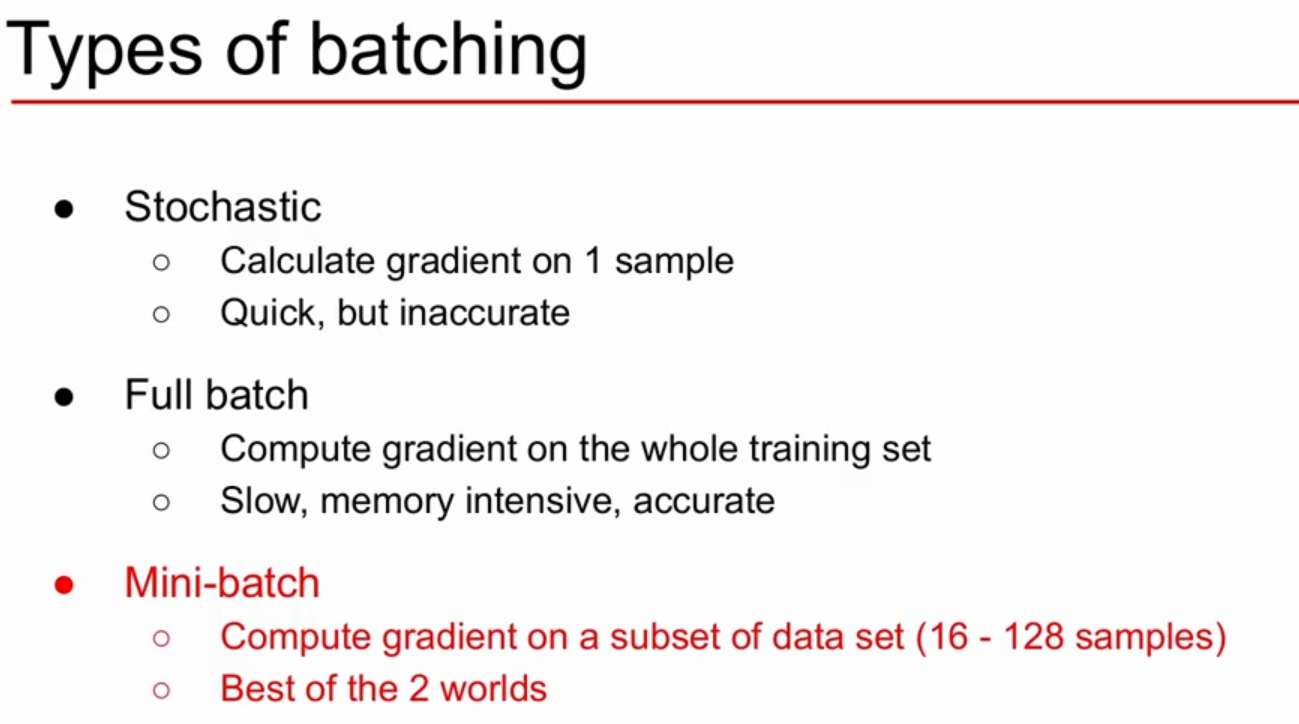